
### PyQuery简介：

`pyquery`是一个类似于jQuery的Python库，它提供了一种方便的方式来解析HTML文档，并使用类似于jQuery的语法进行元素选择和操作。借助`pyquery`，您可以轻松地从HTML文档中提取所需的数据。

### 安装PyQuery：

首先，您需要使用pip安装`pyquery`包：



In [ ]:
!pip install pyquery

### 基本使用方法：

#### 1. **导入模块**：

In [1]:
from pyquery import PyQuery as pq

#### 2. **加载HTML文档**：

In [2]:
html = """
<html>
<head>
  <title>PyQuery Example</title>
</head>
<body>
  <div id="container">
    <ul class="list">
      <li>Item 1</li>
      <li>Item 2</li>
      <li>Item 3</li>
    </ul>
  </div>
</body>
</html>
"""

doc = pq(html) 

**说明**：`doc = pq(html)`：使用pyquery中的PyQuery类将HTML文档加载到一个PyQuery对象中。在这一步中，我们将一个HTML字符串（或者说是HTML文档）传递给PyQuery类的构造函数，并将返回的PyQuery对象赋值给了变量doc。

这个doc对象就代表了整个HTML文档的结构，您可以使用它来查找、操作文档中的元素，以及提取所需的数据。在后续的操作中，我们可以通过doc对象来选择HTML文档中的各种元素，并对其进行操作。

#### 3. **选择元素**：

您可以使用类似于jQuery的选择器语法来选择HTML文档中的元素。


##### **选择元素**


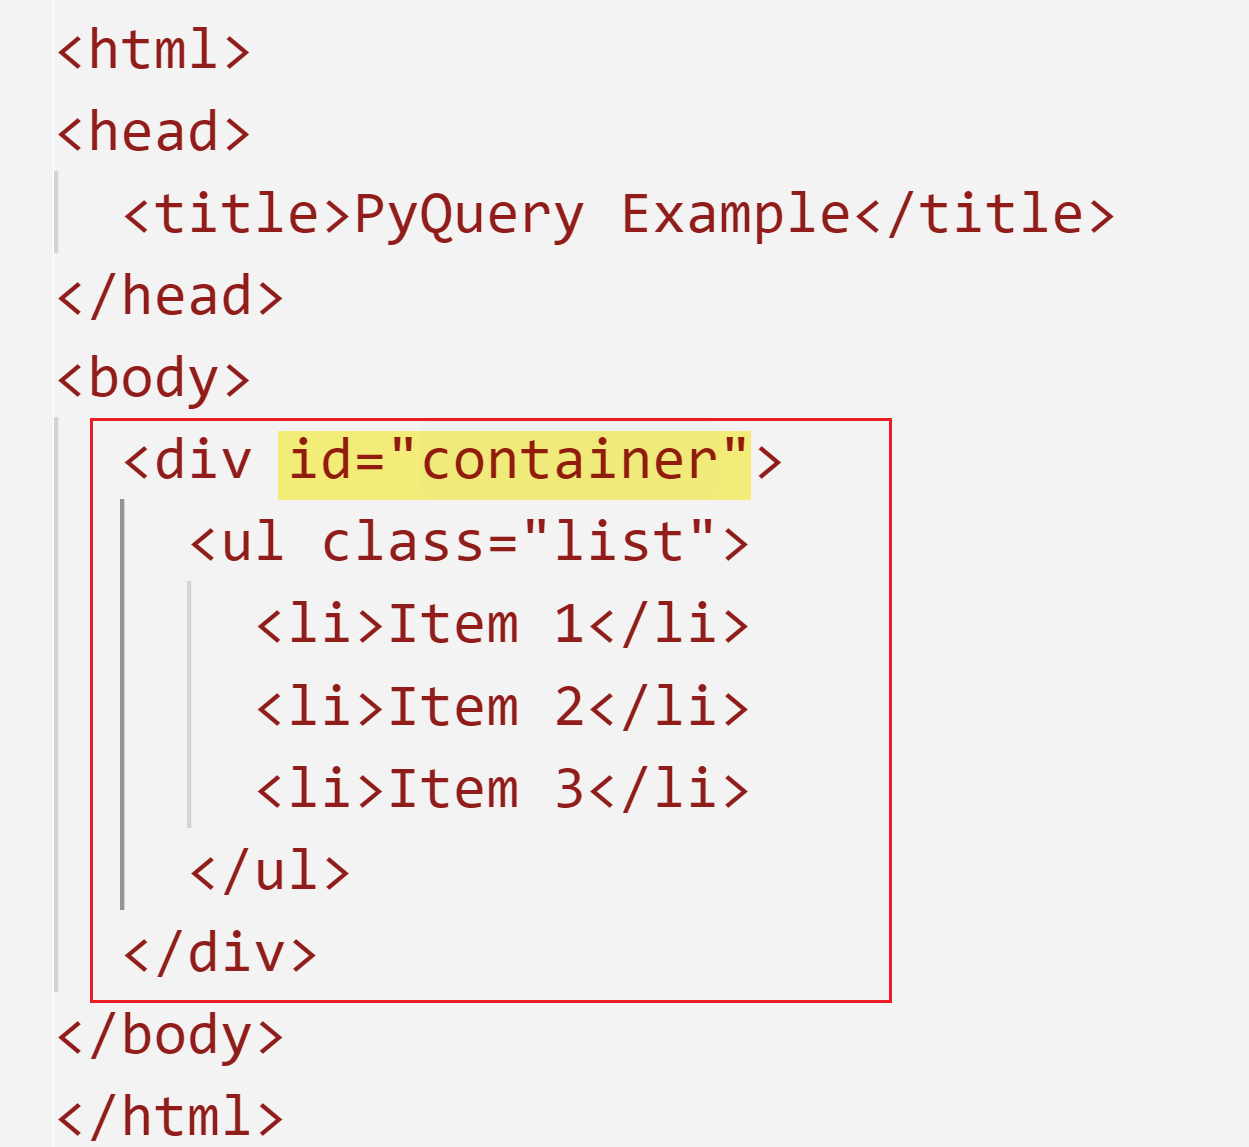

- **重要**：选择id属性使用符号`#`

In [5]:
container = doc('#container') #也可以写成div#container
print(container)

<div id="container">
    <ul class="list">
      <li>Item 1</li>
      <li>Item 2</li>
      <li>Item 3</li>
    </ul>
  </div>



#####  **选择class为list的元素下的li元素**


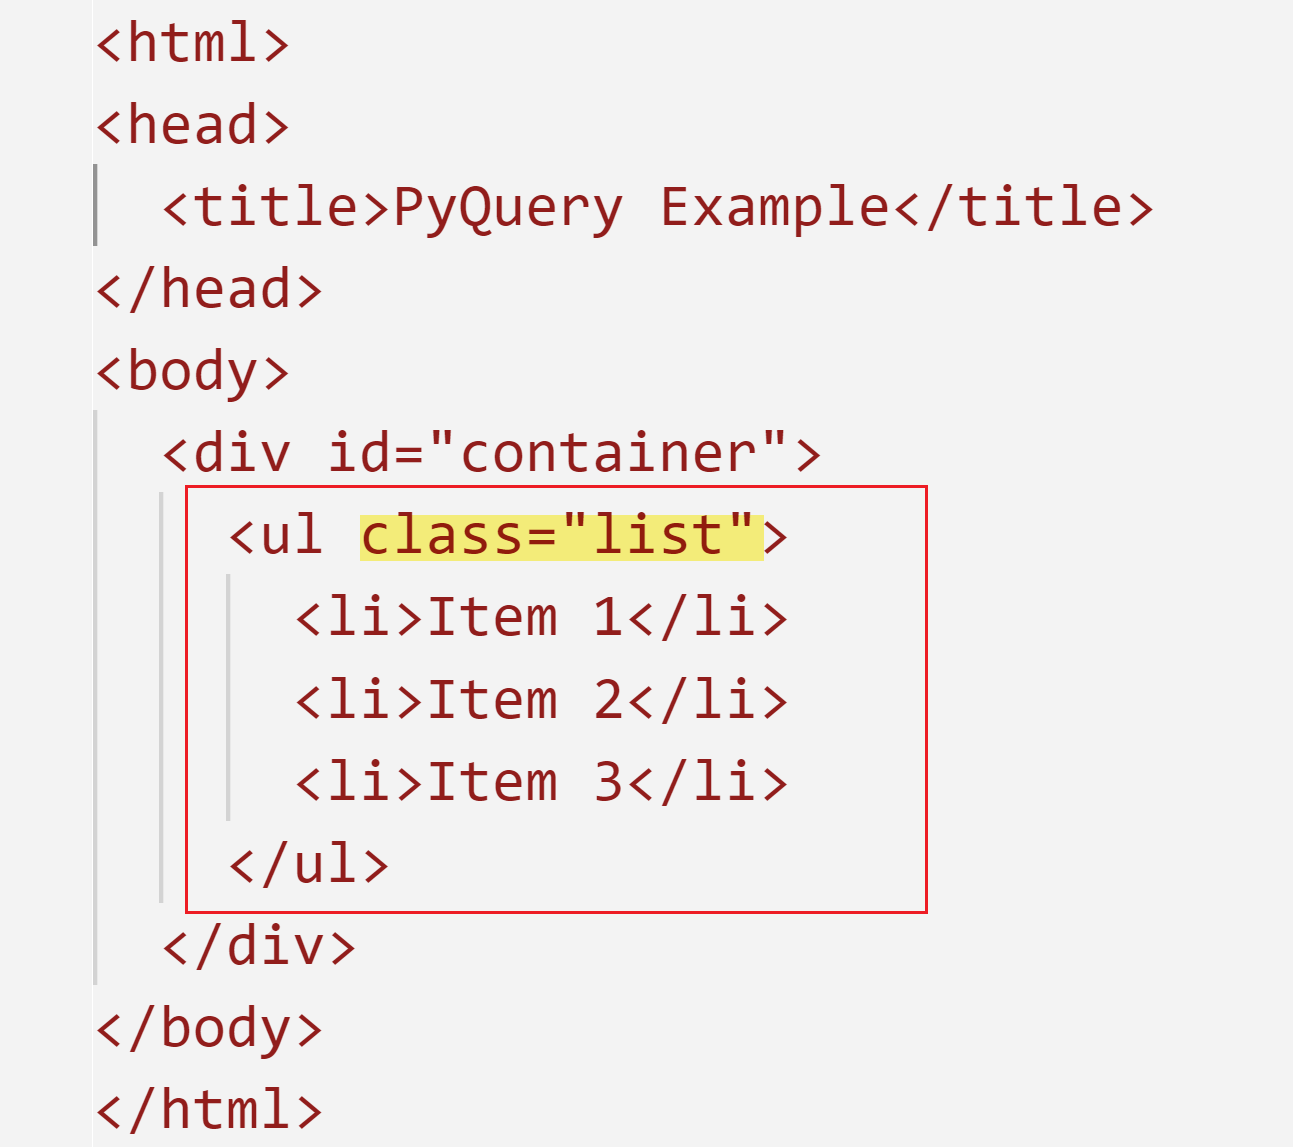

- **重要**：选择属性class使用符号`.`
- **重要**：一级级地筛选元素，元素与元素之间用空格隔开

In [6]:
items = container('.list li')#也可写成 ul.list li 或者 li
print(items)

<li>Item 1</li>
      <li>Item 2</li>
      <li>Item 3</li>
    


**说明**：`.list li`是一个CSS选择器，它指定了要选择的元素。`.`表示class选择器，所以`.list`表示class为list的元素，li表示所有的`<li>`元素。

#### 4. **提取数据**：

一旦选择了元素，您就可以从中提取所需的数据。


#####  **提取文本内容**


In [ ]:
for item in items:
    print(pq(item).text()) #item是字符串类型，所以还要转成pq对象


Item 1
Item 2
Item 3


In [ ]:
#也可以使用 items() 方法遍历每个 <li> 节点

for item in items.items('li'):
    print(item.text()) #item是pyquery对象，调用text()方法获取节点的文本内容

Item 1
Item 2
Item 3


#####  **获取属性值**

In [6]:
link = pq('<a href="https://example.com">Example</a>')
print(link.attr('href'))

https://example.com


#### 5. **链式操作**：

`pyquery`支持链式操作，使得对元素的选择和操作更加简洁和灵活。


#####  **链式操作示例**


In [7]:
container.find('ul').children().eq(1).text()

'Item 2'

- `container.find('ul')`：首先，我们在container对象中查找所有的`<ul>`元素。这里假设container是一个PyQuery对象，代表了HTML文档中的某个部分，例如一个`<div>`元素。

- `.children()`：然后，我们调用`.children()`方法，这会返回所有子元素。在这个例子中，我们得到了所有的`<li>`元素，因为`<ul>`是`<li>`的父元素。

- `.eq(1)`：接着，我们调用`.eq(1)`方法，它会选择索引为1的元素。在Python中，索引从0开始，所以`.eq(1)`选择的是第二个元素。

- `.text()`：最后，我们调用`.text()`方法，它会返回所选元素的文本内容。在这个例子中，它返回的是第二个`<li>`元素的文本内容。

#### 6. **其他功能**：

`pyquery`还提供了许多其他功能，如查找、过滤、修改元素等，使得数据抓取更加高效和方便。


##### **查找元素**


In [8]:
container.find('ul')

[<ul.list>]

#####  **过滤元素**


In [9]:
container('ul li')

[<li>, <li>, <li>]

##### **修改元素属性**

In [10]:
container('a').attr('href', 'https://newlink.com')

# requests + pyquery抓取毒鸡汤

In [13]:
import requests
from pyquery import PyQuery as pq

In [5]:
url = 'http://www.nows.fun/'
response = requests.get(url)


In [10]:
html = response.content.decode('utf-8')
print(html)

<!DOCTYPE html>
<!-- saved from http://nows.fun/ -->
<html><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1">

	<title>毒鸡汤 - 壮士可要来一碗！</title>
	<meta name="description" content="我们精心熬制了有屎以来最毒1000多条经典毒鸡汤,句句“治愈”人心! 只为了帮你更好的看清人生认识自己，直面现实,直面惨淡的人生,不给你励志,不给你慰藉,像一根鞭猛的抽你一下,使你清醒,知道这个世界和你自己最真实的一面,是青少年手机里的必备宝典。">
	<meta name="keywords" content="鸡汤,毒鸡汤,馊鸡汤">
	<meta http-equiv="Cache-Control" content="no-siteapp">
	<meta name="author" content="yatang@126.com" />
	<meta property="og:title" content="毒鸡汤 - 壮士可要来一碗！" />
	<meta property="og:url" content="http://www.nows.fun/" />
	<meta property="og:image" content="http://www.nows.fun/icon.png" />
	<meta property="og:site_name" content="毒鸡汤 - 壮士可要来一碗！" />
	<meta property="og:description" content="我们精心熬制了有屎以来最毒1000多条经典毒鸡汤,句句“治愈”人心! 只为了帮你更好的看清人生认识自己，直面现实,直面惨淡的人生,不给你励志,不给你慰藉,像一根鞭猛的抽你一下,使你清醒,知道这个世界和你自己最真实的一面,是青少年手机里的必备宝典。"/>
	<link rel="icon" href="/fa

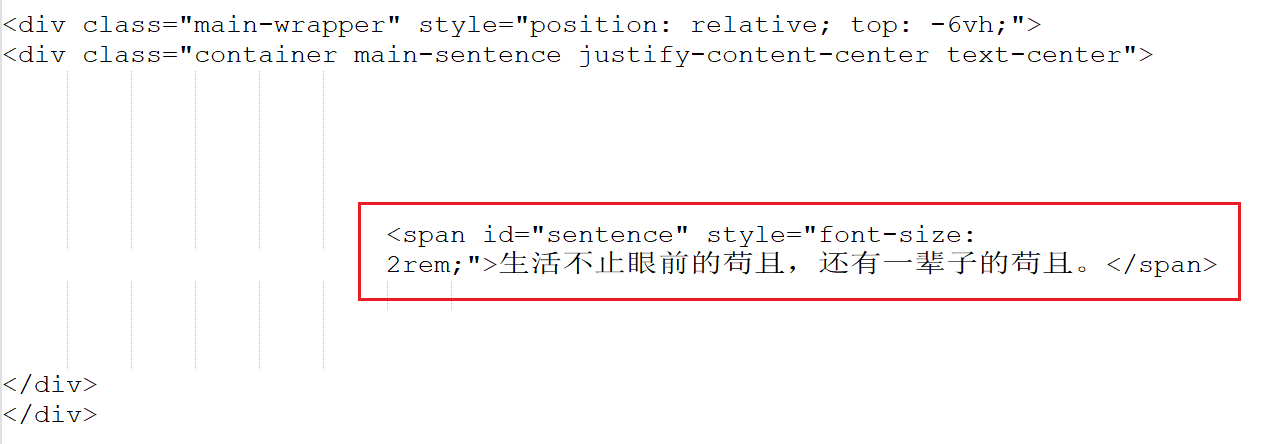

In [15]:
doc = pq(html)
text = doc('span#sentence').text()
print(text)

生活不止眼前的苟且，还有一辈子的苟且。
